### CS2101 - Programming for Science and Finance
Prof. Götz Pfeiffer<br />
School of Mathematical and Statistical Sciences<br />
University of Galway

# Computer Lab 6

Provide answers to the problems in the boxes provided.  Partial marks will be awarded for
participation and engagement.

**Important:** When finished, print this notebook into a **pdf** file and submit this pdf to
**canvas**.  (Submissions in other formats will not be accepted.)

**Deadline** is next Monday at 5pm.

## Setup

This is a `jupyter` notebook.   You can open and interact
with the notebook through one of sites recommended at
its [github repository](https://github.com/gpfeiffer/cs2101).

Or, you can
install and use `jupyter` as a `python` package on your own laptop or PC.  

* First, import some packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

* Set up a random number generator `rng`.

In [2]:
rng = np.random.default_rng()

* And load the digital image of the Long Walk.

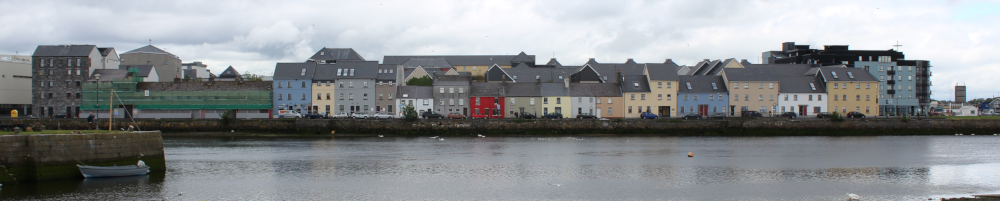

In [3]:
long_walk = Image.open("images/long_walk.png")
long_walk

* Convert the image to an array, then check its shape and data type.

In [4]:
picture = np.asarray(long_walk)
print(picture.shape)
print(picture.dtype)

(201, 1000, 3)
uint8


## 1. Edge Detection.

1. Recall the edge detection procedure based on **Sobel filters** from the lectures.  Write a function `edginess` that takes a digital image, that is a numpy array of shape `(rows, cols, 3)` and data type `uint8`, as input and returns the result of the edge detection as an array of the same shape and data type (so it can be viewed as an image).

In [5]:
def edginess(image):
    Gx = np.array([[-1, 0, 1],
                               [-2, 0, 2],
                               [-1, 0, 1]])
    Gy = np.array([[-1, -2, -1],
                               [ 0,  0,  0],
                               [ 1,  2,  1]])

    # Initialize gradient matrices
    dx = np.zeros_like(image, dtype=np.float32)
    dy = np.zeros_like(image, dtype=np.float32)

    # Get the dimensions of the image
    rows, cols, _ = image.shape

    # Apply the Sobel filter to each pixel (excluding the border pixels)
    for r in range(1, rows - 1):
        for c in range(1, cols - 1):
            for k in range(3):  # For each color channel
                gx = 0
                gy = 0
                for i in range(3):  # Convolution with Gx and Gy
                    for j in range(3):
                        gx += Gx[i, j] * float(image[r - i + 1, c - j + 1, k])
                        gy += Gy[i, j] * float(image[r - i + 1, c - j + 1, k])

                dx[r, c, k] = gx
                dy[r, c, k] = gy

     # Calculate the gradient magnitude
    edges = np.sqrt(dx**2 + dy**2)

    # Normalize the edges to the range [0, 255] and convert to uint8
    edges = (edges / edges.max()) * 255
    edges = edges.astype(np.uint8)

    return edges

2. Apply the `edginess` function to the array `picture` and show the result as an image.

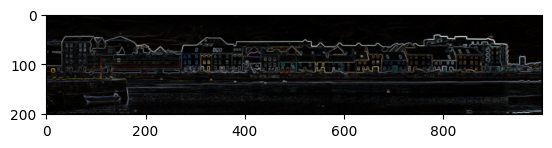

In [6]:
edges = edginess(picture)
plt.imshow(edges)

## 2. Random Image.

1.  Use the random number generator to construct a $(10 \times 20)$-array `numbers` of random integers with values in `range(256)`.

In [7]:
numbers = rng.integers(low=0, high=256, size=(10, 20), dtype=np.uint8)

2. Display the `numbers` array as an image.

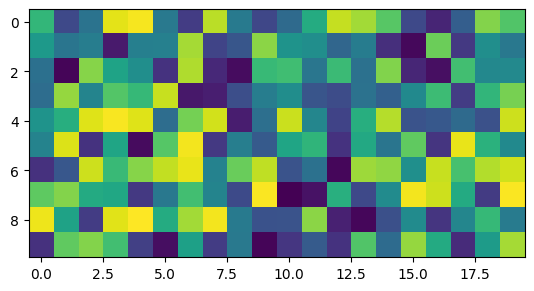

In [8]:
plt.imshow(numbers)

## 3.  Minimal Energy Seams.

1. Implement the minimal energy seam algorithm from the lectures as a function `minimise_paths` which takes a 2D array (of energy values) as input, and returns two arrays of the same shape as the input array, one for the minimal energies, and one for the paths in the form of entries $\pm 1$ and $0$.

In [9]:
def minimise_paths(arr):
    rows, cols = arr.shape[0], arr.shape[1]
    mins = np.zeros(arr.shape)
    paths = np.zeros(arr.shape, dtype=int)

    mins[-1, :] = arr[-1, :]

    for r in reversed(range(rows-1)):
        for c in range(cols):
            minval = arr[r,c]+mins[r+1,c]
            paths[r,c] = 0
            if c > 0:
                val = arr[r,c] + mins[r+1,c-1]
                if val < minval:
                    minval = val
                    paths[r,c] = -1
            if c < cols - 1:
                val = arr[r,c] + mins[r+1, c+1]
                if val < minval:
                    minval = val
                    paths[r,c] = 1
            mins[r,c] = minval
    return mins, paths


2. Apply your function `minimise_paths` to the `numbers` array.  Print the top row of the energy values array, and the entire paths array.

In [10]:
mins, minpaths = minimise_paths(numbers)

print(f"Top Row: \n{mins[0]}\n")
print(f"Energy Values Array: \n{minpaths}")

Top Row: 
[943. 831. 871. 890. 838. 605. 360. 542. 419. 385. 544. 567. 642. 579.
 548. 417. 418. 581. 711. 856.]

Energy Values Array: 
[[ 1  0 -1  1  1  1  1  0 -1 -1  1  1  0  1  0 -1 -1  0 -1  0]
 [ 1  0 -1  1  1  1  1  1  0 -1  1  0  1  0 -1  0 -1 -1  0 -1]
 [ 0 -1  0  1  0  1  1  0 -1 -1  1  1  0 -1 -1 -1  1  0 -1 -1]
 [ 1  0 -1  1  1  0 -1  1  0 -1  1  1  0 -1 -1  0 -1 -1 -1 -1]
 [ 0  1  0  1  0 -1  1  0  1  0 -1  1  0 -1 -1  1  0 -1  0 -1]
 [ 1  0  1  0 -1 -1  1  0 -1  1  0  1  0 -1  1  0 -1  0 -1 -1]
 [ 0  1  0  1  0 -1  1  1  0  1  0 -1 -1  0 -1 -1  1  1  0 -1]
 [ 1  0 -1 -1  1  0 -1  1  1  0 -1  1  1  0 -1  1  0 -1 -1 -1]
 [ 0 -1  1  1  1  0 -1  0  1  0 -1  1  0 -1  0 -1  1  0 -1 -1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


3. Compute a 2D array `sum_edges` from the `edges` array by adding up all $3$ color intensities at each pixel.  Then apply the function `minimise_paths` to the array `sum_edges[:, 1:-1]` and print the minimum and the maximum value of the top row of the resulting energy matrix.  (It is necessary to **exclude the first and last column** from the `minimise_paths` calculation, as those columns consists entirely of zeros.)

In [11]:
sum_edges = np.sum(edges, axis=2)
mins, minpaths = minimise_paths(sum_edges[:, 1:-1])

top_row = mins[0]
min_value = top_row.min()
max_value = top_row.max()

print(f"Top Row min value: {min_value}")
print(f"Top Row max value: {max_value}")

Top Row min value: 3426.0
Top Row max value: 4722.0


## 4. Highlighting and Removing Seams

1. Implement a function `highlight_path` which takes as input an image, a column index, and a paths matrix described in terms of $\pm1$ and $0$, and constructs and returns an image with the path described in this way is highlighted in red.

In [12]:
def highlight_path(im, col, paths):
    new = im.copy()
    
    rows, cols = paths.shape

    # Initialize the column to the starting column
    current_col = col

    for row in range(rows):
        # Ensure the column index is within bounds
        current_col = max(0, min(cols - 1, current_col))

        # Highlight the current pixel in red
        new[row, current_col, 0] = 255  # Red channel
        new[row, current_col, 1] = 0    # Green channel
        new[row, current_col, 2] = 0    # Blue channel

        # Update the column index based on the paths matrix
        if row < rows - 1:  # No update needed for the last row
            current_col += paths[row, current_col]

    return new

2. Apply the function `highlight_path` to the long walk picture  and the paths matrix from its `sum_edges` energy array starting at a column index between $400$ and $600$.

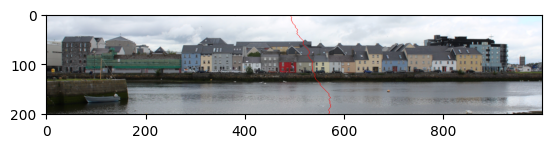

In [13]:
mins, minpaths = minimise_paths(sum_edges[:, 1:-1])

result = highlight_path(picture, np.random.randint(400, 600), paths=minpaths)
plt.imshow(result)

3. Implement a function `remove_path` which (somewhat different from the lecture) takes as input an image, a column index, and a paths matrix in terms of $\pm1$ and $0$, and constructs and returns an image with the path described in this way is removed.

In [14]:
def remove_path(im, col, paths):
 
    
    rows, cols_p = paths.shape
    rows_im, cols_im, _ = im.shape

    
    # Create a copy of the image to avoid modifying the original
    new_im = im.copy()
    
    # Adjust starting column for 'paths' matrix indexing
    current_col = col - 1  # Since 'paths' corresponds to sum_edges[:,1:-1]
    
    for row in range(rows):
        # Ensure 'current_col' is within the valid range for 'paths'
        current_col = max(0, min(cols_p - 1, current_col))
        
        # The actual column in the original image is offset by +1
        actual_col = current_col + 1
        
        # Remove the seam pixel by shifting pixels left
        # For each color channel
        for c in range(3):
            # Shift pixels to the left from the seam column
            new_im[row, actual_col:cols_im-1, c] = im[row, actual_col+1:cols_im, c]
        
        # If the seam is not at the last column, set the last pixel to 0 or any desired value
        new_im[row, cols_im-1, :] = 0  # Optional: Set to black
        
        # Update 'current_col' based on the paths matrix
        if row < rows - 1:
            direction = paths[row, current_col]
        
            current_col += direction
    
    # After shifting, remove the last column as it's now redundant
    new_im = new_im[:, :-1, :]
    
    return new_im


4.  In relation to the `sum_edges` matrix above, determine the column index of the seam of minimal energy, then remove the corresponding seam from the long walk picture.

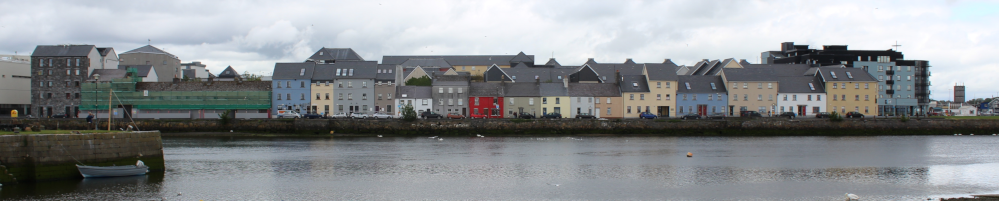

In [15]:
mins, minpaths = minimise_paths(sum_edges[:, 1:-1])

start_col = np.argmin(mins[0]) + 1  # +1 to adjust for the sliced sum_edges

reduced_image = remove_path(picture, start_col, minpaths)
Image.fromarray(reduced_image)

## 5. Seam Carving.

1. Combine the functions into one that takes an image as argument, 1. determines the edginess of the image, 2. uses the edginess to identify the seam of minimal energy, 3. removes the seam from the image and 4. returns the reduced image.

In [16]:
def carved(im):

    # Step 1
    edges = edginess(im)
    sum_edges = np.sum(edges, axis=2)

    # Step 2
    mins, minpaths = minimise_paths(sum_edges[:, 1:-1])  # Exclude first and last columns
    start_col = np.argmin(mins[0]) + 1  # +1 to adjust for the sliced sum_edges

    # Step 3.
    new = remove_path(im, start_col, minpaths)
    
    # Step 4. 
    return new

2. Apply the function to the long walk image

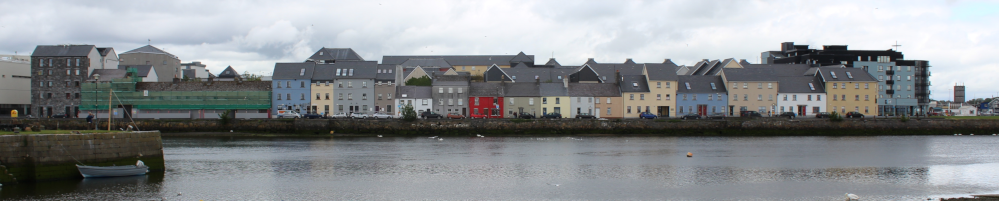

In [17]:
carved_image = carved(picture)
Image.fromarray(carved_image)

3.  Use a `for` loop to apply the above procedure sufficiently often to the long walk image until the image is half as wide as before.  This might take a while ... perhaps 20 mins or more ... (if this takes too long apply the procedure to a smaller clip of the picture).

Removing seam 500/500


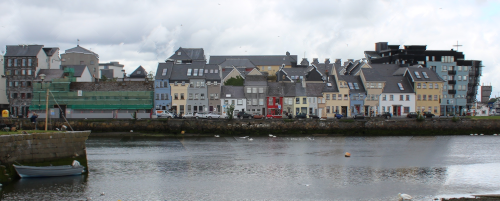

In [18]:
from IPython.display import clear_output

# Determine the number of seams to remove (half the original width)
original_width = picture.shape[1]
target_width = original_width // 2
num_seams_to_remove = original_width - target_width

# Iteratively remove seams until the image is half as wide
for _ in range(num_seams_to_remove):
    clear_output(wait=True)
    print(f"Removing seam {_ + 1}/{num_seams_to_remove}")
    picture = carved(picture)


Image.fromarray(picture)
